In [54]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import time

time.perf_counter()
start = time.time()

n_samples = 10000
n_step = 10000
#在（0，0）生成黑洞
#在以（0，0）为圆心，


r = np.random.uniform(-n_samples**0.5,n_samples**0.5,n_samples)
theta = np.random.uniform(0,2*np.pi,n_samples)
x = r*np.cos(theta)
y = r*np.sin(theta)
vx = np.random.normal(size = n_samples)
vy = np.random.normal(size = n_samples)

x_rand = []
y_rand = []
for i in tqdm(range(n_step)):
    x_rand.append(np.random.random(n_samples)*np.cos(theta))
    y_rand.append(np.random.random(n_samples)*np.sin(theta))



end = time.time()
elapse = end - start
print(elapse)

100%|██████████| 10000/10000 [00:08<00:00, 1191.90it/s]

8.602898120880127


In [55]:
time.perf_counter()
start = time.time()

for step in tqdm(range(n_step)):
    r2 = x**2 + y**2
    F = 10 / r2**1.5
    ax = -F * x
    ay = -F * y
    vx += ax
    vy += ay
    x += x_rand[step] + vx
    y += y_rand[step] + vy
    
end = time.time()
elapse = end - start
print(elapse)

100%|██████████| 10000/10000 [00:05<00:00, 1811.61it/s]

5.539401054382324


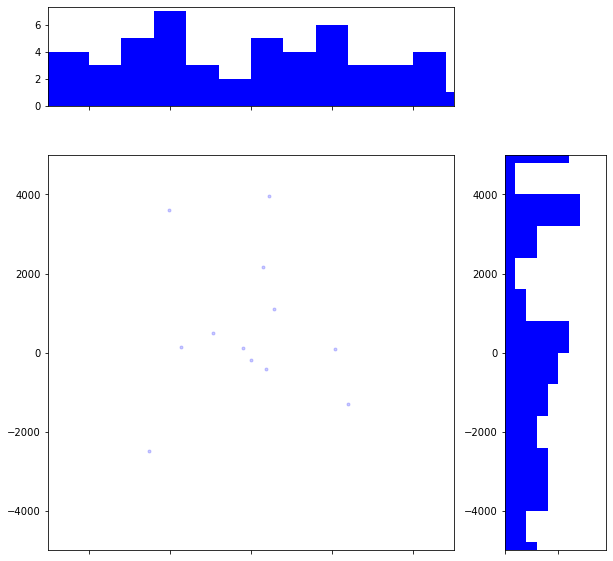

In [50]:
plt.figure(figsize=(10,10))
grid = plt.GridSpec(4, 4, wspace = 0.5, hspace = 0.5)

main_ax = plt.subplot(grid[1:4,0:3])
plt.plot(x,y,'bo', markersize=3, alpha=0.2)
plt.xlim(-n_samples*5,n_samples*5)
plt.ylim(-n_samples*5,n_samples*5)

y_hist = plt.subplot(grid[1:4,3], xticklabels=[], sharey=main_ax)
plt.hist(y,100,range=(-40000,40000),orientation='horizontal', color='blue')

x_hist = plt.subplot(grid[0,0:3], xticklabels=[], sharex=main_ax)
plt.hist(x,100,range=(-40000,40000),orientation='vertical', color='blue')

plt.show()